# Generate random images of gaussian spots, save to npz file

Generates random images containing gaussian spots of various sizes.
Save npz file containing X, y variables with the training data: X - np.array (batch, y, x, channel)

y - list of length batch, y[i] is a np.array of length (N,2) containing [y,x] coordinates of all dot center positions in the image (y before x as in image/matrix indexing)


## Set output folder and image file names

In [2]:
import numpy as np
import os
import errno
from deepcell_spots.simulated_image_generators import gaussian_spot_image_generator

data_folder = '/data/simulated_dots/' # folder in which to save npz file
npz_filename = 'simulated_dots.npz'

## Set parameters for image generator

In [2]:
num_images = 100 #1000 # number of images to generate
L = 128 # square image side length
N_min = 10 #50 # number of dots in the image uniformly distributed between N_min and N_max
N_max = 20 #100
sigma_mean = 3.5 # mean sigma of gaussian dot
sigma_std = 0.5 # deviation from sigma
A_mean = 1 # intensity of gaussian
A_std = 0.1#5 # intensity of gaussian
noise_mean = 0 # white noise added to entire image - mean and std
noise_std = 0.01

## Generate images and save output

In [3]:
g = gaussian_spot_image_generator(L, N_min, N_max, sigma_mean, sigma_std, A_mean, A_std, noise_mean = noise_mean, noise_std = noise_std,segmask=True,yield_pos=True)

X = []
y = []

for ind in range(num_images):
    img, label, x_list, y_list, bboxes = next(g)
    dot_coords = np.array([y_list, x_list]).T
    
    X.append(np.expand_dims(img,axis=-1)) # add channel axis (add channel support later)
    y.append(dot_coords)
    
    #img = np.round(img*255)
    #img = img.astype(np.uint8) # conversion to uint8 creates a file that microsoft programs such as paint will open for viewing

X = np.array(X)
print(X.shape)

(100, 128, 128, 1)


## plot one image

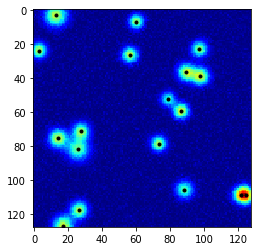

In [5]:
import matplotlib.pyplot as plt

index = 0
#plt.figure(figsize=(15,15))
plt.imshow(X[index,...,0],cmap='jet')
plt.plot(y[index][:,1],y[index][:,0],'.k')

## save to npz file

In [6]:
import os
# create output directory if it doesn't exist
if not os.path.exists(data_folder):
    os.mkdir(data_folder)

In [7]:
# Save training data in npz format
npz_file_name = os.path.join(data_folder,npz_filename)
np.savez(npz_file_name, X=X, y=y)